In [2]:
import os
import random
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator, array_to_img
from tensorflow.keras.applications import EfficientNetB1

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Dense,Conv2D,Dropout,GlobalAveragePooling2D

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import imutils 

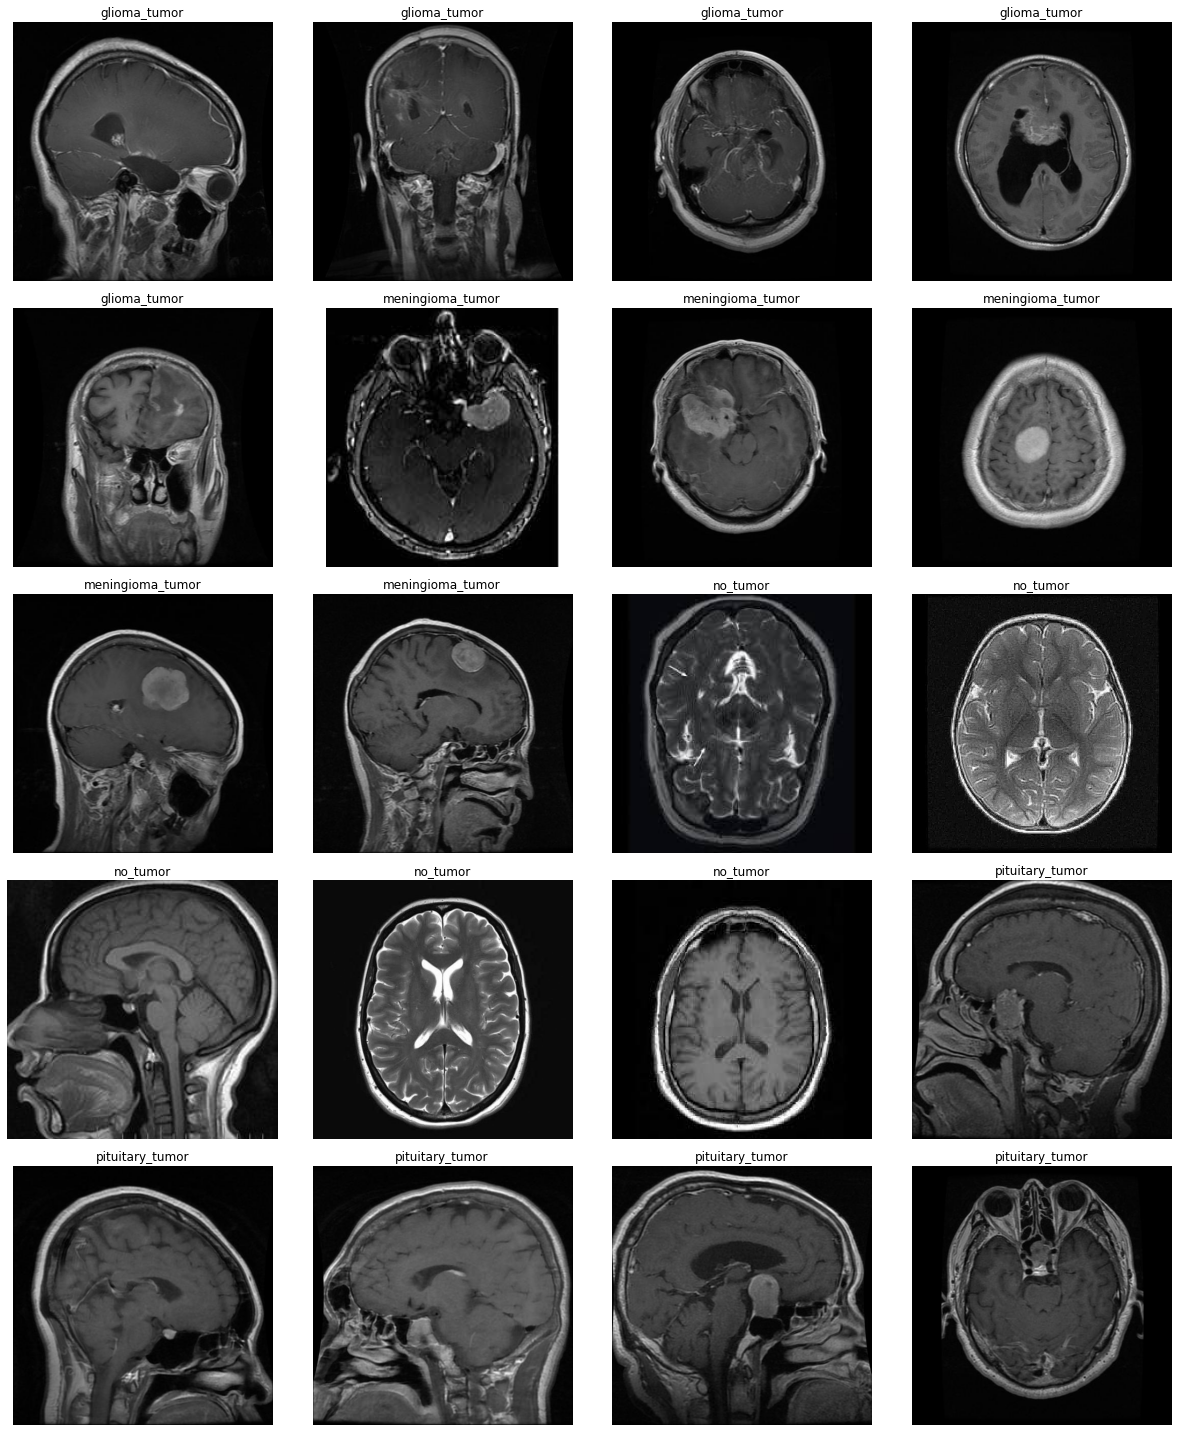

In [3]:
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
import math

# Define directories
train_dir = "D:/summer internship_may_2024/JNTU-GV/brain tumor segmentation using DL/Dataset/Training/"
test_dir = "D:/summer internship_may_2024/JNTU-GV/brain tumor segmentation using DL/Dataset/Testing/"

# List the classes in the training directory
classes = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]

# Create a dictionary to hold the file paths for each class
files_path_dict = {}

for c in classes:
    class_dir = os.path.join(train_dir, c)
    files_path_dict[c] = [os.path.join(class_dir, f) for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]

# Calculate the number of subplots needed
num_images = 5 * len(classes)
cols = 4
rows = math.ceil(num_images / cols)

# Plot the images
plt.figure(figsize=(17, rows * 4))  # Adjust the figure size based on the number of rows
index = 0

for c in classes:
    random.shuffle(files_path_dict[c])
    path_list = files_path_dict[c][:5]

    for i in range(5):
        index += 1
        plt.subplot(rows, cols, index)
        img = load_img(path_list[i])
        plt.imshow(img)
        plt.title(c)
        plt.axis('off')  # Hide the axis for better visualization

plt.tight_layout()
plt.show()


In [4]:
# Function to crop images

def crop_image(image, plot=False):
    
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.GaussianBlur(img_gray, (5, 5), 0)
    
    img_thresh = cv2.threshold(img_gray, 45, 255, cv2.THRESH_BINARY)[1]
    img_thresh = cv2.erode(img_thresh, None, iterations=2)
    img_thresh = cv2.dilate(img_thresh, None, iterations=2)

    contours = cv2.findContours(img_thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    c = max(contours, key=cv2.contourArea)

    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]            

    if plot:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Original Image')
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)
        plt.tick_params(axis='both', which='both',top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Cropped Image')
        plt.show()
    
    return new_image

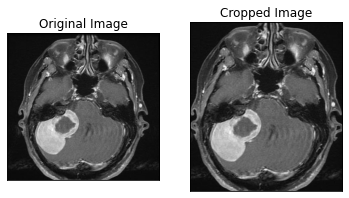

In [5]:
# Check the crop

example_img = cv2.imread("D:/summer internship_may_2024/JNTU-GV/brain tumor segmentation using DL/Dataset/Testing/meningioma_tumor/Te-me_0013.jpg")
cropped_image_example = crop_image(example_img, plot=True)

In [6]:
# Crop the Training Images and Save to respective directories
glioma = train_dir + "glioma_tumor"
meningioma = train_dir + "meningioma_tumor"
no_tumor = train_dir + "no_tumor"
pituitary = train_dir + "pituitary_tumor"

j = 0
for i in tqdm(os.listdir(glioma)):
  path = os.path.join(glioma, i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)
  if img is not None:
    img = cv2.resize(img, (224, 224))
    save_path = r"D:/summer internship_may_2024/JNTU-GV/brain tumor segmentation using DL/Dataset/Training/glioma_tumor" + str(j) + ".jpg"
    cv2.imwrite(save_path, img)
    j = j+1

j = 0
for i in tqdm(os.listdir(meningioma)):
  path = os.path.join(meningioma, i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)
  if img is not None:
    img = cv2.resize(img, (224, 224))
    save_path = r"D:/summer internship_may_2024/JNTU-GV/brain tumor segmentation using DL/Dataset/Training/meningioma_tumor" +str(j) +".jpg"
    cv2.imwrite(save_path, img)
    j = j+1

j = 0
for i in tqdm(os.listdir(no_tumor)):
  path = os.path.join(no_tumor, i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)
  if img is not None:
    img = cv2.resize(img, (224,224))
    save_path = r"D:/summer internship_may_2024/JNTU-GV/brain tumor segmentation using DL/Dataset/Training/no_tumor" +str()+".jpg"
    cv2.imwrite(save_path, img)
    j = j+1

j = 0
for i in tqdm(os.listdir(pituitary)):
  path = os.path.join(pituitary, i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)
  if img is not None:
    img = cv2.resize(img, (224,224))
    save_path = r"D:/summer internship_may_2024/JNTU-GV/brain tumor segmentation using DL/Dataset/Training/pituitary_tumor" +str()+".jpg"
    cv2.imwrite(save_path, img)
    j = j + 1

100%|██████████████████████████████████████████████████████████████████████████████| 1457/1457 [00:16<00:00, 87.05it/s]


In [7]:
# Crop the Testing Images and Save to respective directories
glioma = test_dir + "glioma_tumor"
meningioma = test_dir + "meningioma_tumor"
no_tumor = test_dir + "no_tumor"
pituitary = test_dir + "pituitary_tumor"

j = 0
for i in tqdm(os.listdir(glioma)):
  path = os.path.join(glioma, i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)
  if img is not None:
    img = cv2.resize(img, (224, 224))
    save_path = r"D:/summer internship_may_2024/JNTU-GV/brain tumor segmentation using DL/Dataset/Testing/glioma_tumor"+ str(j) + ".jpg"
    cv2.imwrite(save_path, img)
    j = j+1

j = 0
for i in tqdm(os.listdir(meningioma)):
  path = os.path.join(meningioma, i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)
  if img is not None:
    img = cv2.resize(img, (224, 224))
    save_path = r"D:/summer internship_may_2024/JNTU-GV/brain tumor segmentation using DL/Dataset/Testing/meningioma_tumor" +str(j) +".jpg"
    cv2.imwrite(save_path, img)
    j = j+1

j = 0
for i in tqdm(os.listdir(no_tumor)):
  path = os.path.join(no_tumor, i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)
  if img is not None:
    img = cv2.resize(img, (224,224))
    save_path = r"D:/summer internship_may_2024/JNTU-GV/brain tumor segmentation using DL/Dataset/Testing/no_tumor"+str()+".jpg"
    cv2.imwrite(save_path, img)
    j = j+1

j = 0
for i in tqdm(os.listdir(pituitary)):
  path = os.path.join(pituitary, i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)
  if img is not None:
    img = cv2.resize(img, (224,224))
    save_path = r"D:/summer internship_may_2024/JNTU-GV/brain tumor segmentation using DL/Dataset/Testing/pituitary_tumor" +str()+".jpg"
    cv2.imwrite(save_path, img)
    j = j + 1


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:03<00:00, 97.02it/s]


In [8]:
# Use Image Data Generator

datagen = ImageDataGenerator(rotation_range=10, height_shift_range=0.2, horizontal_flip=True, validation_split=0.2)
train_data = datagen.flow_from_directory(r"D:/summer internship_may_2024/JNTU-GV/brain tumor segmentation using DL/Dataset/Training", target_size=(224,224), batch_size=32, class_mode='categorical', subset='training')

valid_data = datagen.flow_from_directory(r"D:/summer internship_may_2024/JNTU-GV/brain tumor segmentation using DL/Dataset/Training", target_size=(224,224), batch_size=32, class_mode='categorical', subset='validation')

test_datagen = ImageDataGenerator()

test_data = datagen.flow_from_directory(r"D:/summer internship_may_2024/JNTU-GV/brain tumor segmentation using DL/Dataset/Testing", target_size=(224,224), class_mode='categorical')

     

Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [9]:
# View the class dictionary

print(train_data.class_indices)
print(test_data.class_indices)

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}
{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}


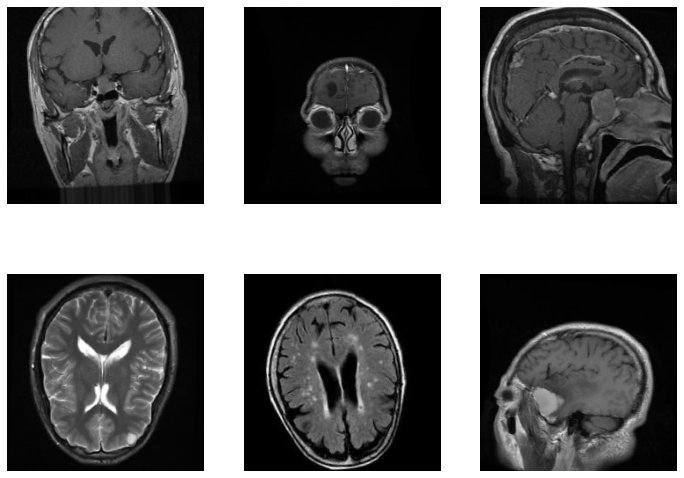

In [10]:
# View the augmented data

sample_x, sample_y =next(train_data)
plt.figure(figsize=(12,9))
for i in range (6):
  plt.subplot(2, 3, i+1)
  sample = array_to_img(sample_x[i])
  plt.axis('off')
  plt.grid(False)
  plt.imshow(sample)  
plt.show()


In [11]:
# Build the Model

effnet = EfficientNetB1(weights="imagenet", include_top=False, input_shape=(224,224, 3))

model = effnet.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(4, activation="softmax")(model)
model = Model(inputs= effnet.input, outputs=model)

model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
_______________________________________________________________________________________

In [12]:
# Import necessary libraries
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

# Define callbacks
checkpoint = ModelCheckpoint("model.keras", monitor="val_accuracy", save_best_only=True, mode="auto", verbose=1)
earlystop = EarlyStopping(monitor="val_accuracy", patience=5, mode="auto", verbose=1)

# Print confirmation
print("Model compiled successfully and callbacks defined.")


Model compiled successfully and callbacks defined.


In [13]:
# Train the model

history = model.fit(train_data, epochs=2, validation_data=valid_data, verbose=1, callbacks=[checkpoint, earlystop])

Epoch 1/2
143/143 [==============================] - ETA: 0s - loss: 0.4819 - accuracy: 0.8254
Epoch 00001: val_accuracy improved from -inf to 0.81683, saving model to model.keras
143/143 [==============================] - 914s 6s/step - loss: 0.4819 - accuracy: 0.8254 - val_loss: 0.5278 - val_accuracy: 0.8168
Epoch 2/2
143/143 [==============================] - ETA: 0s - loss: 0.1642 - accuracy: 0.9466
Epoch 00002: val_accuracy improved from 0.81683 to 0.90184, saving model to model.keras
143/143 [==============================] - 872s 6s/step - loss: 0.1642 - accuracy: 0.9466 - val_loss: 0.3051 - val_accuracy: 0.9018


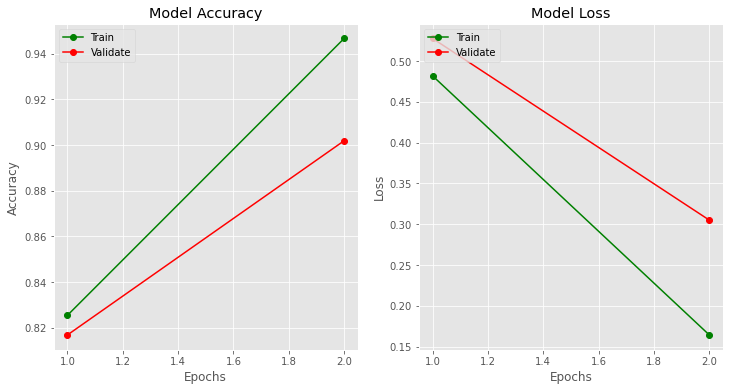

In [15]:
# Plot the training curves

plt.style.use("ggplot")
plt.figure(figsize=(12,6))
epochs = range(1,3)
plt.subplot(1,2,1)
plt.plot(epochs, history.history["accuracy"], "go-")
plt.plot(epochs, history.history["val_accuracy"], "ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","Validate"], loc="upper left")

plt.subplot(1,2,2)
plt.plot(epochs, history.history["loss"], "go-")
plt.plot(epochs, history.history["val_loss"], "ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","Validate"], loc="upper left")

plt.show()

In [16]:
# Evaluate the model on Test Set

model.evaluate(test_data)

41/41 [==============================] - 34s 837ms/step - loss: 0.2089 - accuracy: 0.9283


[0.20886822044849396, 0.9282990097999573]

no_tumor


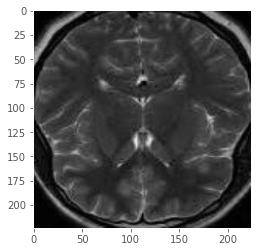

In [17]:
# Obtain Prediction on Test Image

class_dict = {0: "glioma_tumor", 1: "meningioma_tumor", 2: "no_tumor", 3: "pituitary_tumor"}

test_img1 = cv2.imread(r"D:/summer internship_may_2024/JNTU-GV/brain tumor segmentation using DL/Dataset/Training\no_tumor.jpg")
plt.imshow(test_img1)

plt.grid(False)

test_img1 = np.expand_dims(test_img1, axis=0)

pred = model.predict(test_img1)
pred = np.argmax(pred)
pred_class =class_dict[pred]
print(pred_class)